In [45]:
import csv
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn

%matplotlib widget

directory = os.getcwd()

In [46]:
with open(directory+'\\..\\Dataset\\ML_cardio_dataSet_final.csv', 'r') as csvfile:
    dataset = list(csv.reader(csvfile))

datasetLength = len(dataset)
dataLabels = dataset[0]
dataLabels = dataLabels[1:13]
dataLabels[1] = 'sex'
dataset = dataset[1:datasetLength]
npDataset = np.array(dataset)
npDataset = np.delete(npDataset,0,1)
datasetLength -= 1

print("Data Labels:", dataLabels)
print("Data Length:", datasetLength)

Data Labels: ['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
Data Length: 64511


1st Clean Dataset length:  64511


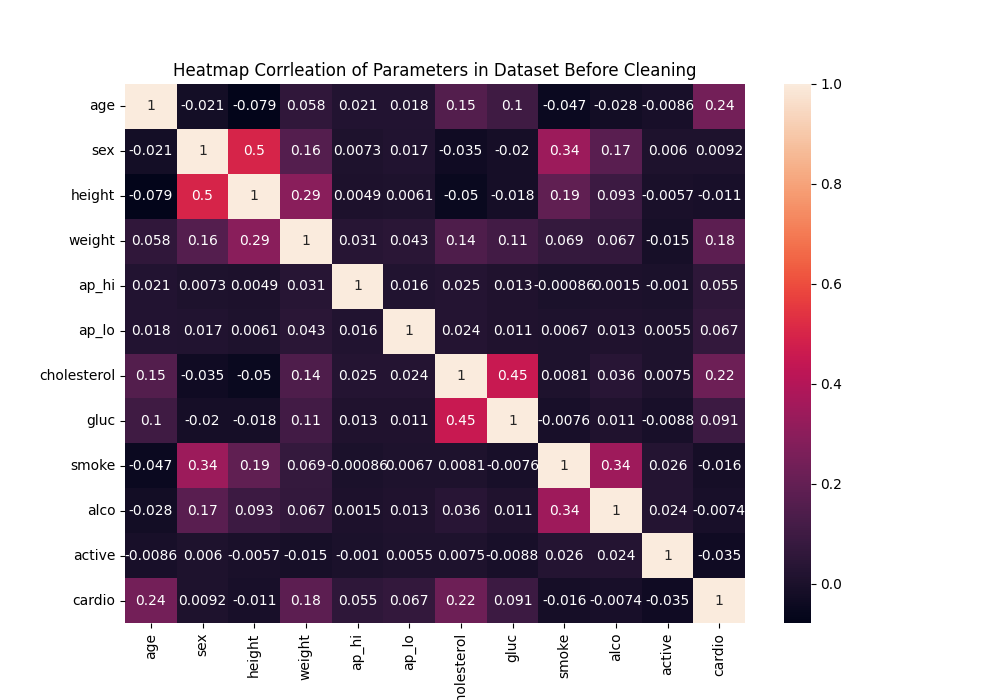

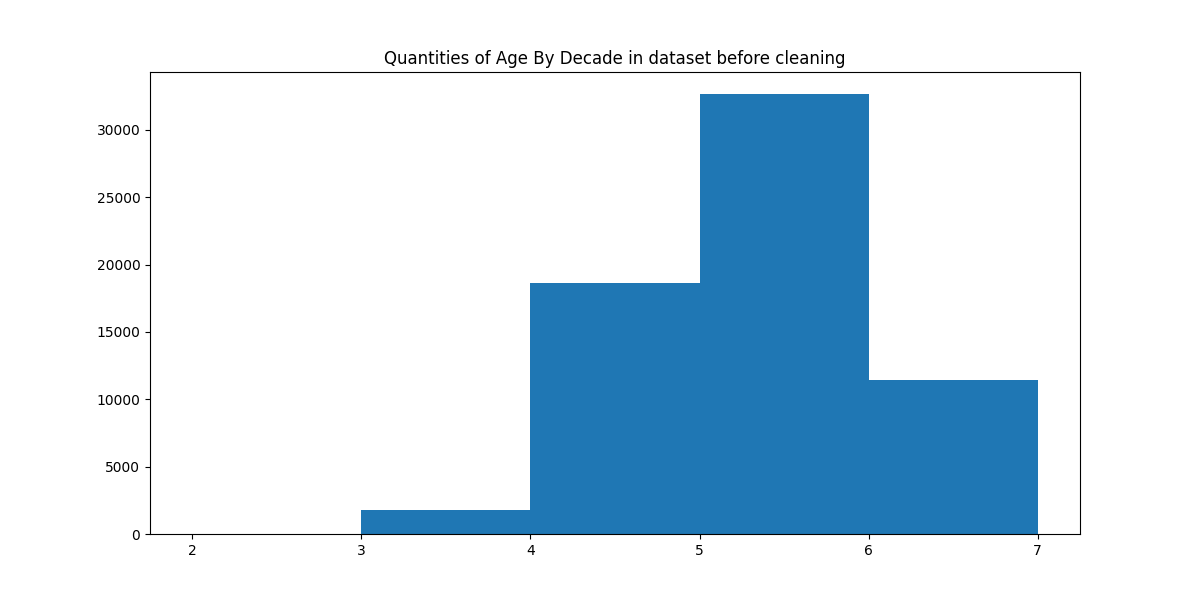

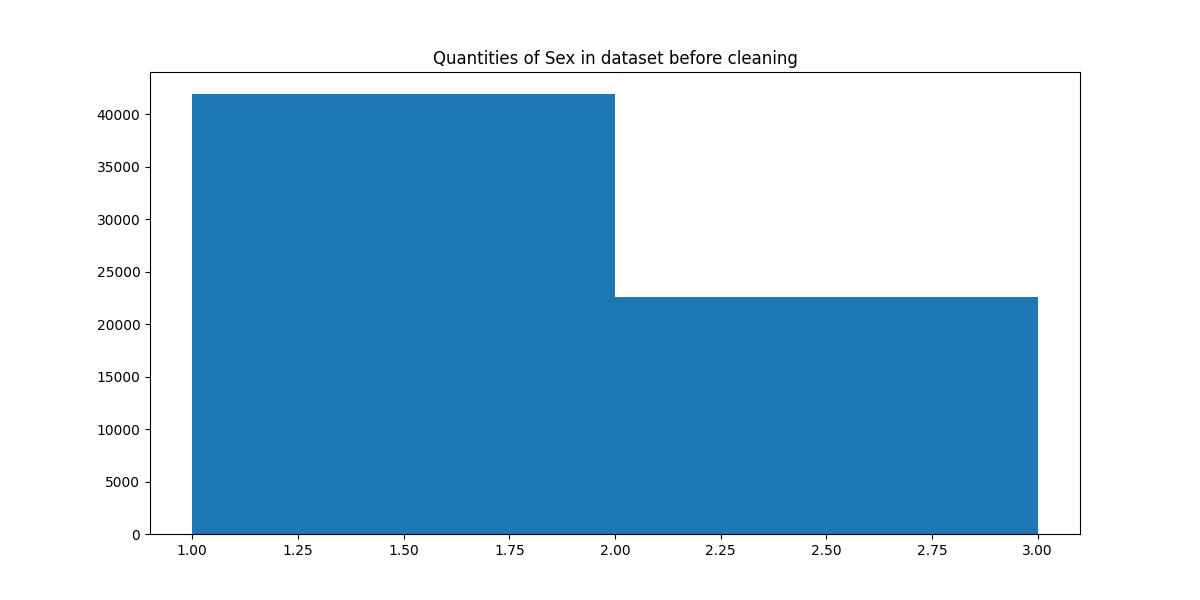

In [47]:
rowNum = 0
for row in npDataset:
    try:
        tempInt = int(row[1])
        row[1] = tempInt
    except:
        pass
    try:
        if (type(row[1]) != int):
            if (row[1].lower() == "f" or row[1].lower() == "female"):
                npDataset[rowNum, 1] = 1
            elif (row[1].lower() == "m" or row[1].lower() == "male"):
                npDataset[rowNum, 1] = 2
    except:
        pass
    rowNum += 1

npDataset[:,0] = [ int(round(float(x))) for x in npDataset[:,0]]
npDataset[:,1] = [ int(round(float(x))) for x in npDataset[:,1]]
npDataset[:,2] = [ int(round(float(x))) for x in npDataset[:,2]]
npDataset[:,3] = [ float(x) for x in npDataset[:,3]]
npDataset[:,4] = [ int(round(float(x))) for x in npDataset[:,4]]
npDataset[:,5] = [ int(round(float(x))) for x in npDataset[:,5]]
npDataset[:,6] = [ int(round(float(x))) for x in npDataset[:,6]]
npDataset[:,7] = [ int(round(float(x))) for x in npDataset[:,7]]
npDataset[:,8] = [ int(round(float(x))) for x in npDataset[:,8]]
npDataset[:,9] = [ int(round(float(x))) for x in npDataset[:,9]]
npDataset[:,10] = [ int(round(float(x))) for x in npDataset[:,10]]
npDataset[:,11] = [ int(round(float(x))) for x in npDataset[:,11]]
    
print("1st Clean Dataset length: ", len(npDataset))

dataLabelsArrayIn = np.array([x for x in dataLabels])
npFrameIn = pd.DataFrame(npDataset, columns=dataLabelsArrayIn)

fig = plt.figure(figsize =(10, 7))
plt.title('Heatmap Corrleation of Parameters in Dataset Before Cleaning')
seaborn.heatmap(npFrameIn.corr(), annot=True)
plt.show()

plt.figure(figsize=(12, 6))
histData = [math.floor(int(x)/(365.25*10)) for x in npDataset[:,0]]
plt.title('Quantities of Age By Decade in dataset before cleaning')
plt.hist(histData,bins=5,range=(min(histData),max(histData)+1))
plt.show()

plt.figure(figsize=(12, 6))
histData = [int(x) for x in npDataset[:,1]]
plt.title('Quantities of Sex in dataset before cleaning')
plt.hist(histData,bins=2,range=(min(histData),max(histData)+1))
plt.show()


In [ ]:

for i in range(0,len(dataLabels)-1):

    tempFloat = [float(x) for x in npDataset[:,i]]

    minimums = min(tempFloat)
    maximums = max(tempFloat) 
    print(npDataset[i], ":  min: ", minimums, " max:", maximums)

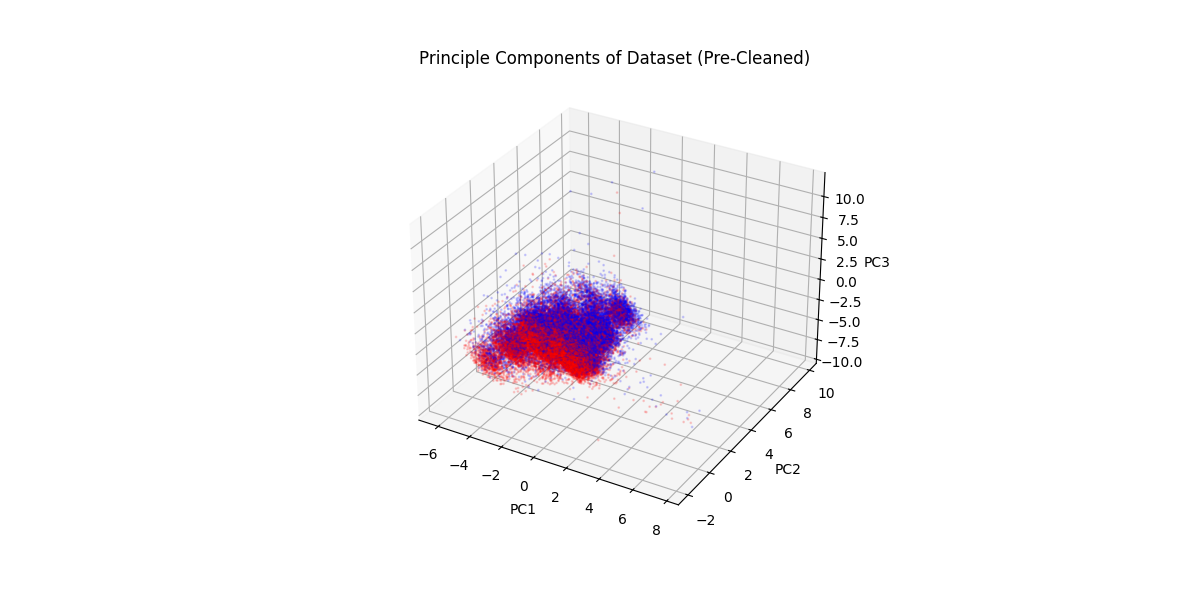

In [16]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(npDataset[:,0:len(dataLabels)-1])

pca = PCA(n_components=3)
components = pca.fit_transform(scaled_X)

pcaHue = pd.DataFrame(data = npDataset[:,len(dataLabels)-1], columns=['cardio'])

componentsDf = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3'])
pcaDf = pd.concat([componentsDf, pcaHue], axis=1)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

x3d = pcaDf["PC1"]
y3d = pcaDf["PC2"]
z3d = pcaDf["PC3"]
l3d = pcaDf["cardio"]

l3d = l3d.map({'0':'red','1':'blue'})

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Principle Components of Dataset (Pre-Cleaned)")

scatterPlotData = ax.scatter(x3d,y3d,z3d, c = l3d, s = 1, alpha = 0.15, )

In [17]:
oldestPersonDays = 42369
tallestPersonCm = 272
heaviestPerson = 650 
lightestPerson = 6.3
lowestApHi = 50
highestApHi = 370
lowestApLo = 20
highestApLo = 360
lowestBMI = 12.0 #https://www.ennonline.net/fex/15/limits
fatalBMI = 80.0

cleaned_npDataset = npDataset

goodEntries = 0
entries = 0

for row in npDataset:
    
    tempBmi = float(row[3])/(pow((float(row[2])/100), 2))

    if (
            ((int(row[0]) >= 0) and (int(row[0]) <= oldestPersonDays)) and
            (((int(row[1]) == 1) or (int(row[1]) == 2))) and
            ((int(row[2]) >= 0) and (int(row[2]) <= tallestPersonCm)) and
            ((float(row[3]) >= lightestPerson) and (float(row[3]) <= heaviestPerson)) and
            ((int(row[4]) >= lowestApHi) and (int(row[4]) <= highestApHi)) and
            ((int(row[5]) >= lowestApLo) and (int(row[5]) <= highestApLo)) and
            ((int(row[6]) == 1) or (int(row[6]) == 2) or (int(row[6]) == 3)) and
            ((int(row[7]) == 1) or (int(row[7]) == 2) or (int(row[7]) == 3)) and
            ((int(row[8]) == 0) or (int(row[8]) == 1)) and
            ((int(row[9]) == 0) or (int(row[9]) == 1)) and
            ((int(row[10]) == 0) or (int(row[10]) == 1)) and
            ((int(row[11]) == 0) or (int(row[11]) == 1)) and
            ((float(tempBmi) >= lowestBMI) and (float(tempBmi) <= fatalBMI))
            ):
        goodEntries += 1
    else:
        #print("does:", row, " = ", cleaned_npDataset[goodEntries])
        cleaned_npDataset = np.delete(cleaned_npDataset, goodEntries, axis=0)

    entries += 1

print("2st Clean Dataset length: ", goodEntries, ", ", len(cleaned_npDataset))

2st Clean Dataset length:  63426 ,  63426


In [18]:
ageDiv_npDataset2 = cleaned_npDataset

for row in ageDiv_npDataset2:
    row[0] = math.floor(float(int(row[0]))/365.25)

print(ageDiv_npDataset2)

[['50' '2' '168' ... '0' '1' '0']
 ['47' '1' '156' ... '0' '0' '0']
 ['59' '1' '151' ... '0' '0' '0']
 ...
 ['52' '2' '183' ... '1' '0' '1']
 ['61' '1' '163' ... '0' '0' '1']
 ['56' '1' '170' ... '0' '1' '0']]


In [19]:
#https://www.baptisthealth.com/blog/heart-care/healthy-blood-pressure-by-age-and-gender-chart

tempDataset = ageDiv_npDataset2[:,0:12]
tempResults = ageDiv_npDataset2[:,11]

bmi = np.array([['0.0'] for x in tempDataset])
bloodPressure = np.array([['0'] for x in tempDataset])
BPPA = np.array([['0.0'] for x in tempDataset])

for x in range(0,len(tempDataset)):
    bmi[x] = float(tempDataset[x,3])/(pow((float(tempDataset[x,2])/100), 2))

    if((int(tempDataset[x,4])<120) and (int(tempDataset[x,5])<80)):
        bloodPressure[x] = 1
    elif((int(tempDataset[x,4])<130) and (int(tempDataset[x,5])<80)):
        bloodPressure[x] = 2
    elif(((int(tempDataset[x,4])>=130) and (int(tempDataset[x,4])<140)) or ((int(tempDataset[x,5])>=80) and (int(tempDataset[x,5])<90))):
        bloodPressure[x] = 3
    elif(((int(tempDataset[x,4])>=140) and (int(tempDataset[x,4])<180)) or ((int(tempDataset[x,5])>=90) and (int(tempDataset[x,5])<120))):
        bloodPressure[x] = 4
    else:
        bloodPressure[x] = 5
    
    tempAge = int(tempDataset[x,1])
    if int(tempDataset[x,1]) == 1:
        if (tempAge>=18) and (tempAge<40):
            BPPA[x] = ((float(int(tempDataset[x,4]))/110) + (float(int(tempDataset[x,5]))/68))/2
        elif(tempAge>=40) and (tempAge<60):
            BPPA[x] = ((float(int(tempDataset[x,4]))/122) + (float(int(tempDataset[x,5]))/74))/2
        else:
            BPPA[x] = ((float(int(tempDataset[x,4]))/139) + (float(int(tempDataset[x,5]))/68))/2
    else:
        if (tempAge>=18) and (tempAge<40):
            BPPA[x] = ((float(int(tempDataset[x,4]))/119) + (float(int(tempDataset[x,5]))/70))/2
        elif(tempAge>=40) and (tempAge<60):
            BPPA[x] = ((float(int(tempDataset[x,4]))/124) + (float(int(tempDataset[x,5]))/77))/2
        else:
            BPPA[x] = ((float(int(tempDataset[x,4]))/133) + (float(int(tempDataset[x,5]))/69))/2


dataLabelsNew = np.insert(dataLabels, 11, np.array(['bmi','BPGroup', 'BPPA']))

print(dataLabelsNew)

['age' 'sex' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active' 'bmi' 'BPGroup' 'BPPA' 'cardio']


In [20]:
tempDataset = np.insert(tempDataset, 11, np.rot90(bmi), axis=1)
tempDataset = np.insert(tempDataset, 12, np.rot90(bloodPressure), axis=1)
tempDataset = np.insert(tempDataset, 13, np.rot90(BPPA), axis=1)

cleaned_npDataset2 = tempDataset

In [21]:
tempColumn = [ int(math.floor(float(x)/(10))) for x in cleaned_npDataset2[:,0]]

decades = np.array(range(min(tempColumn), max(tempColumn)+1))

useIQR = 0

quartileMultiplier = 1.5

zScoreOutlier = 3

cleaned_npDataset3 = np.empty(shape=[0,len(dataLabelsNew)])

for decadeToMask in decades:

    print("Decade: ", decadeToMask)

    for sex in [1,2]:

        tempMask =  [[0] for x in cleaned_npDataset2]

        for i in range(0,len(cleaned_npDataset2)):
            tempMask[i] = ((int(cleaned_npDataset2[i,1]) == sex) & (int(tempColumn[i]) == decadeToMask))

        tempArray = cleaned_npDataset2[tempMask]

        QuartileVal = np.empty(shape=[12,2])
        IQRVal = np.empty(shape=[12,1])
        AcceptedVal = np.empty(shape=[12,2])



        for x in [2,3,4,5]:
            tempVals = [float(i) for i in cleaned_npDataset2[:,x]]
            if (useIQR == 1):
                QuartileVal[x] = [np.percentile(tempVals, 25),np.percentile(tempVals, 75)]
                IQRVal[x] = (QuartileVal[x,1]-QuartileVal[x,0])
                AcceptedVal[x, 0] = QuartileVal[x,0]-quartileMultiplier*IQRVal[x]
                AcceptedVal[x, 1] = QuartileVal[x,1]+quartileMultiplier*IQRVal[x]
            else:
                tempMean = np.mean(tempVals)
                tempStd = np.std(tempVals)
                AcceptedVal[x, 0] = tempMean-zScoreOutlier*tempStd
                AcceptedVal[x, 1] = tempMean+zScoreOutlier*tempStd
                
        arrayToAppend = tempArray

        goodEntries = 0
        entries = 0
        rejectedEntries = 0

        if(tempArray.size > 1):
            for row in tempArray:
                
                if (
                        ((int(row[2]) >= AcceptedVal[2,0]) and (int(row[2]) <= AcceptedVal[2,1])) and
                        ((float(row[3]) >= AcceptedVal[3,0]) and (float(row[3]) <= AcceptedVal[3,1])) and
                        ((int(row[4]) >= AcceptedVal[4,0]) and (int(row[4]) <= AcceptedVal[4,1])) and
                        ((int(row[5]) >= AcceptedVal[5,0]) and (int(row[5]) <= AcceptedVal[5,1]))
                        ):
                    goodEntries += 1
                else:
                    rejectedEntries += 1
                    #print("does:", row, " = ", cleaned_npDataset[goodEntries])
                    arrayToAppend = np.delete(arrayToAppend, goodEntries, axis=0)

                entries += 1

        print("Sex: ", sex, ", entries: ", entries, ", rejected: ", 100*(rejectedEntries/entries), "%")

        if(arrayToAppend.size > 0):
            cleaned_npDataset3 = np.append(cleaned_npDataset3,arrayToAppend,axis=0)

print("3rd Clean Dataset length: ", len(cleaned_npDataset3))

Decade:  2
Sex:  1 , entries:  2 , rejected:  0.0 %
Sex:  2 , entries:  1 , rejected:  0.0 %
Decade:  3
Sex:  1 , entries:  1107 , rejected:  2.619692863595303 %
Sex:  2 , entries:  665 , rejected:  3.4586466165413534 %
Decade:  4
Sex:  1 , entries:  11428 , rejected:  2.1176058802940148 %
Sex:  2 , entries:  6889 , rejected:  3.3241399332268835 %
Decade:  5
Sex:  1 , entries:  21566 , rejected:  2.735787814151906 %
Sex:  2 , entries:  10517 , rejected:  3.6892649995245796 %
Decade:  6
Sex:  1 , entries:  7198 , rejected:  3.278688524590164 %
Sex:  2 , entries:  4053 , rejected:  3.7996545768566494 %
3rd Clean Dataset length:  61535


In [22]:


for i in range(0,len(dataLabelsNew)-1):

    tempFloat = [float(x) for x in cleaned_npDataset3[:,i]]

    minimums = min(tempFloat)
    maximums = max(tempFloat) 
    print(dataLabelsNew[i], ":  min: ", minimums, " max:", maximums)

age :  min:  29.0  max: 64.0
sex :  min:  1.0  max: 2.0
height :  min:  141.0  max: 188.0
weight :  min:  32.0  max: 116.0
ap_hi :  min:  80.0  max: 175.0
ap_lo :  min:  53.0  max: 110.0
cholesterol :  min:  1.0  max: 3.0
gluc :  min:  1.0  max: 3.0
smoke :  min:  0.0  max: 1.0
alco :  min:  0.0  max: 1.0
active :  min:  0.0  max: 1.0
bmi :  min:  12.0  max: 55.0
BPGroup :  min:  1.0  max: 4.0
BPPA :  min:  0.7  max: 1.4


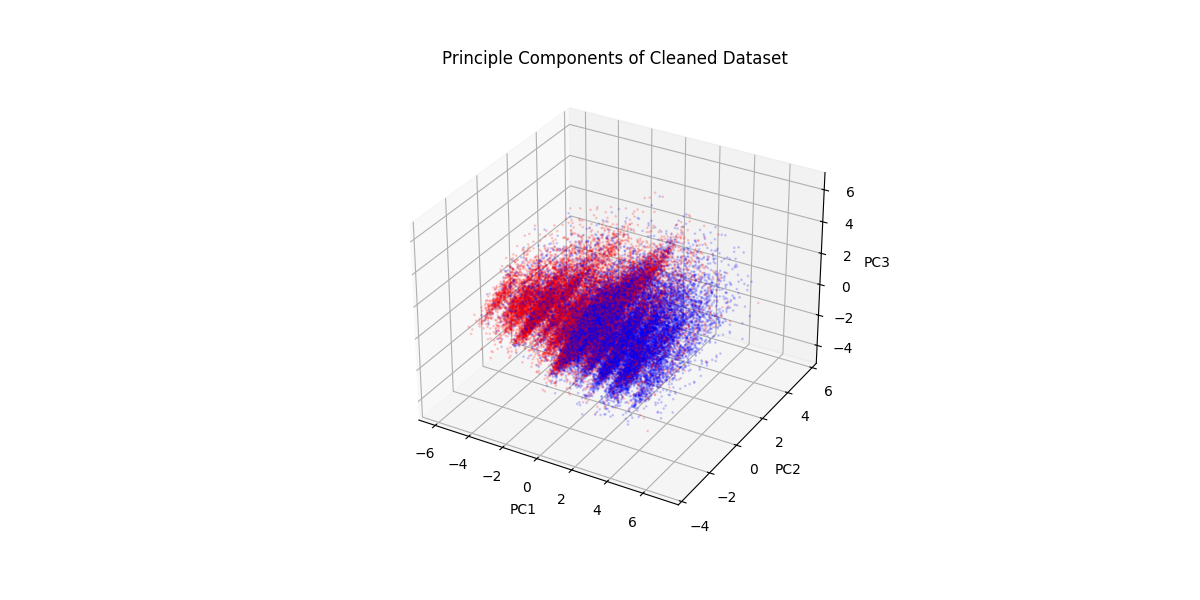

In [23]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(cleaned_npDataset3[:,0:len(dataLabelsNew)-1])

pca = PCA(n_components=3)
components = pca.fit_transform(scaled_X)

pcaHue = pd.DataFrame(data = cleaned_npDataset3[:,len(dataLabelsNew)-1], columns=['cardio'])

componentsDf = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3'])
pcaDf = pd.concat([componentsDf, pcaHue], axis=1)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

x3d = pcaDf["PC1"]
y3d = pcaDf["PC2"]
z3d = pcaDf["PC3"]
l3d = pcaDf["cardio"]

l3d = l3d.map({'0':'red','1':'blue'})

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Principle Components of Cleaned Dataset")

ax.scatter(x3d,y3d,z3d, c = l3d, s = 1, alpha = 0.15, )

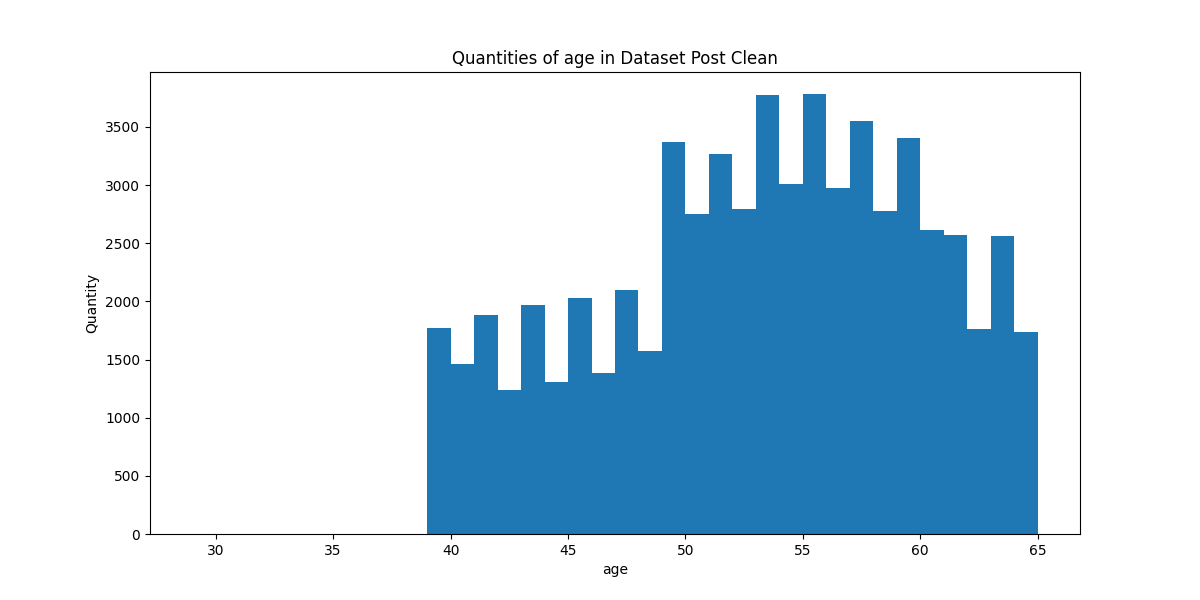

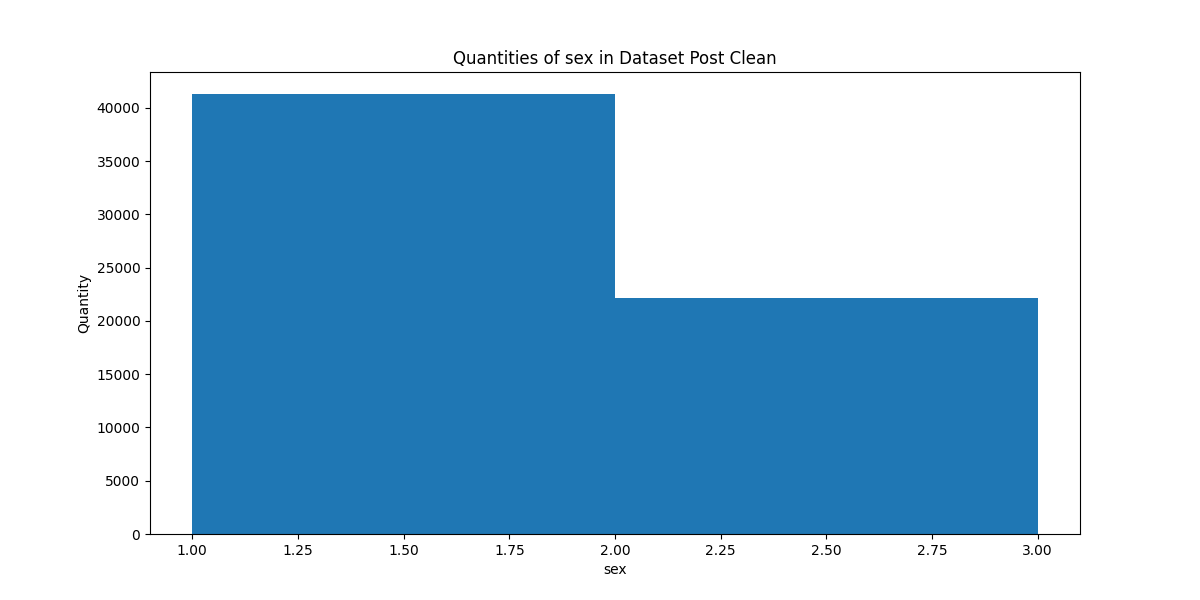

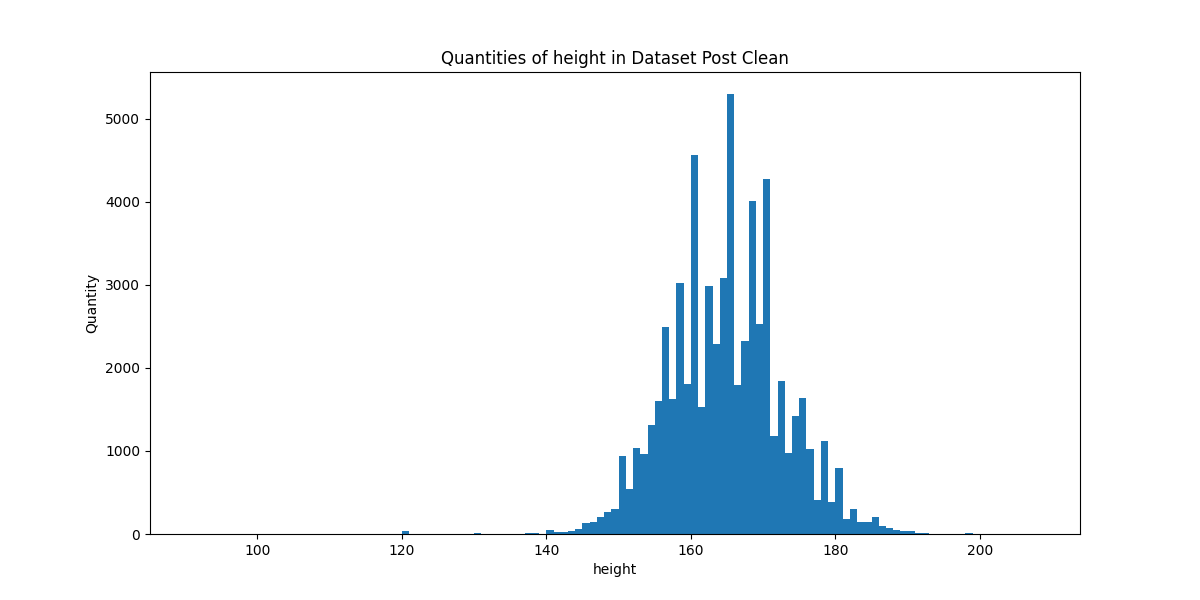

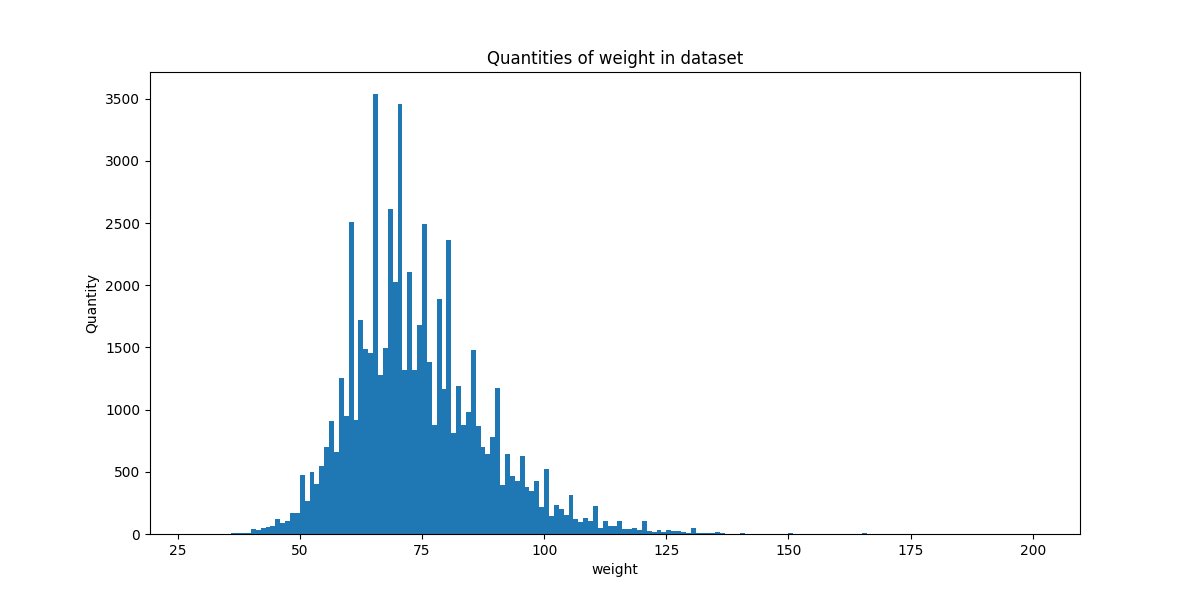

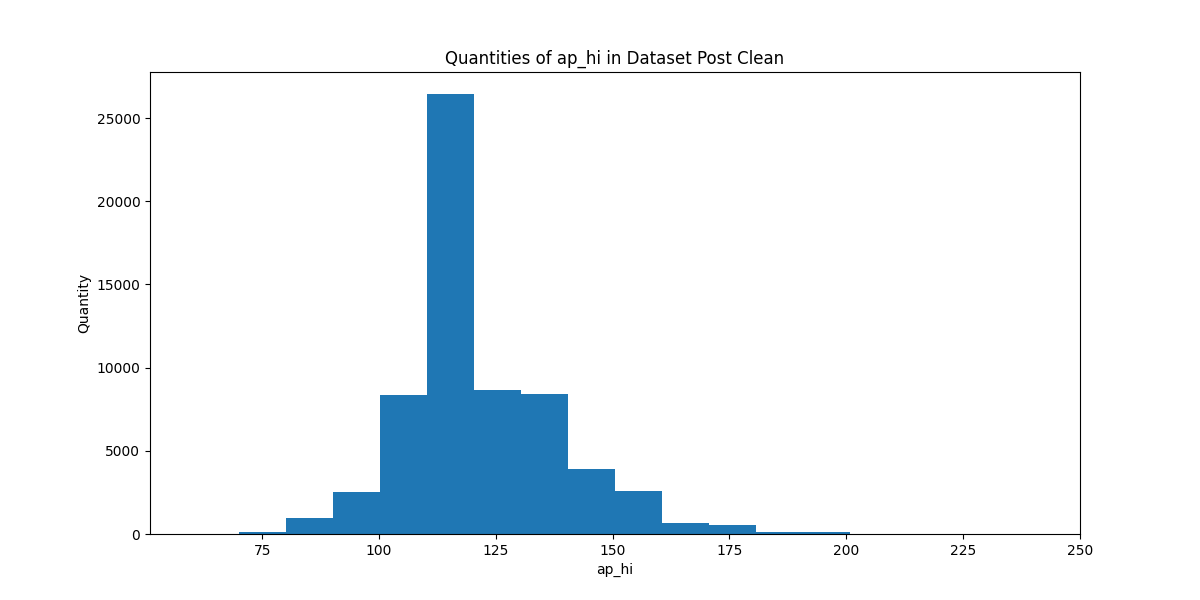

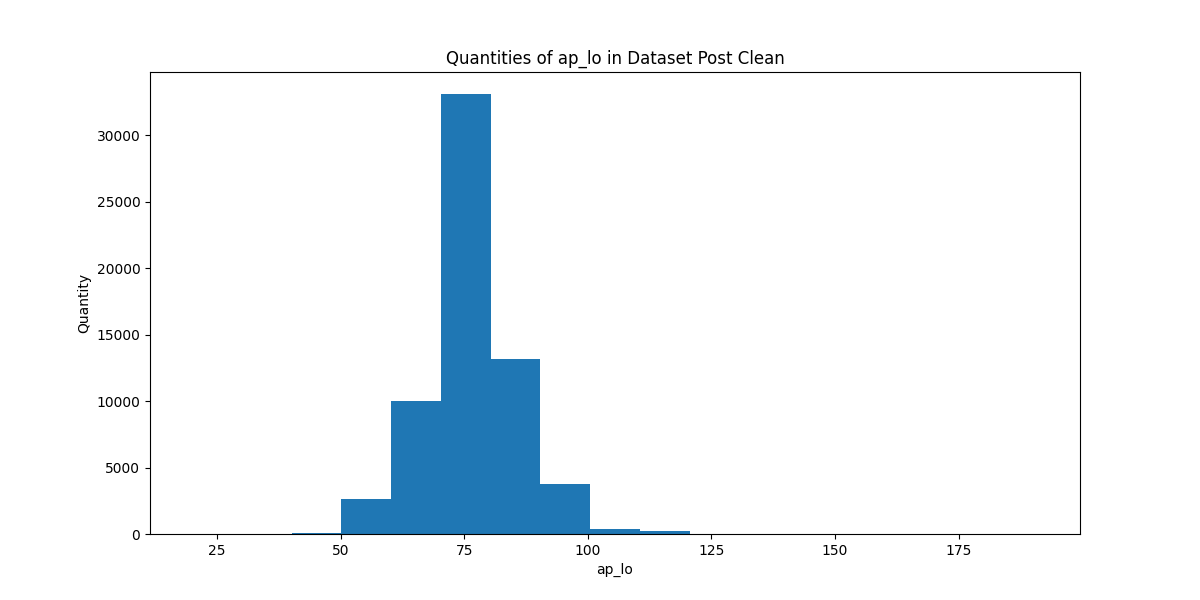

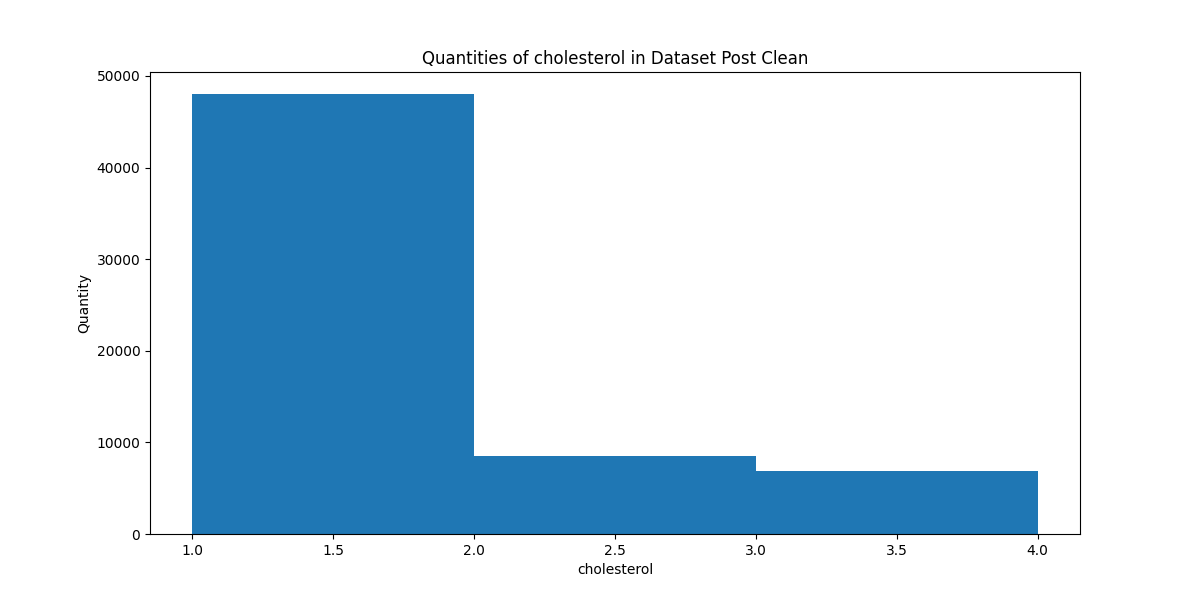

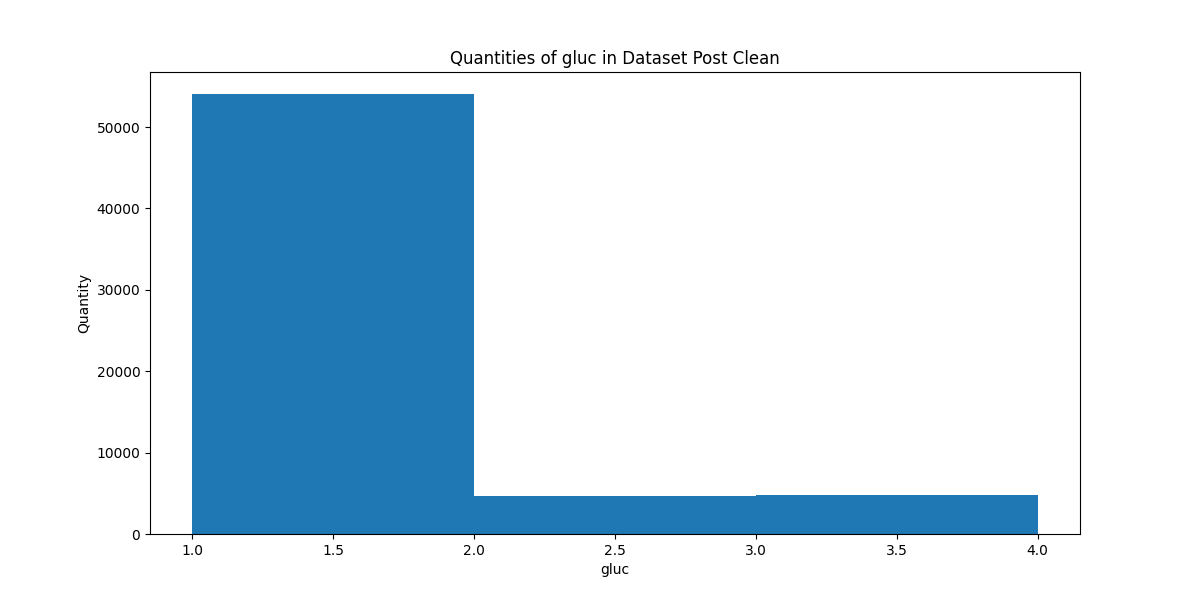

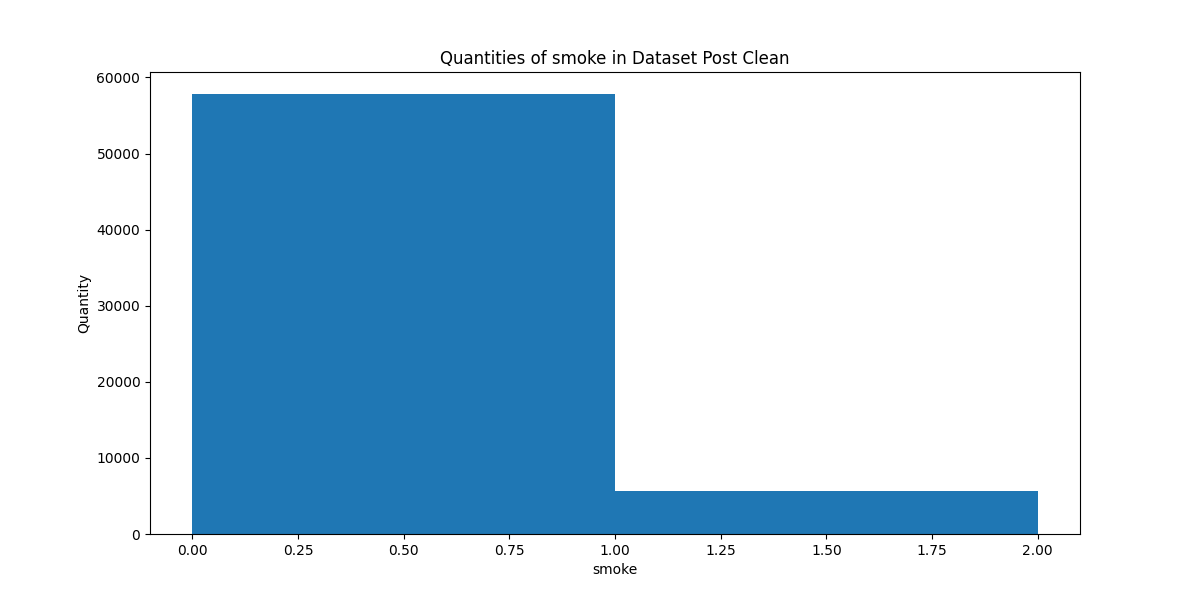

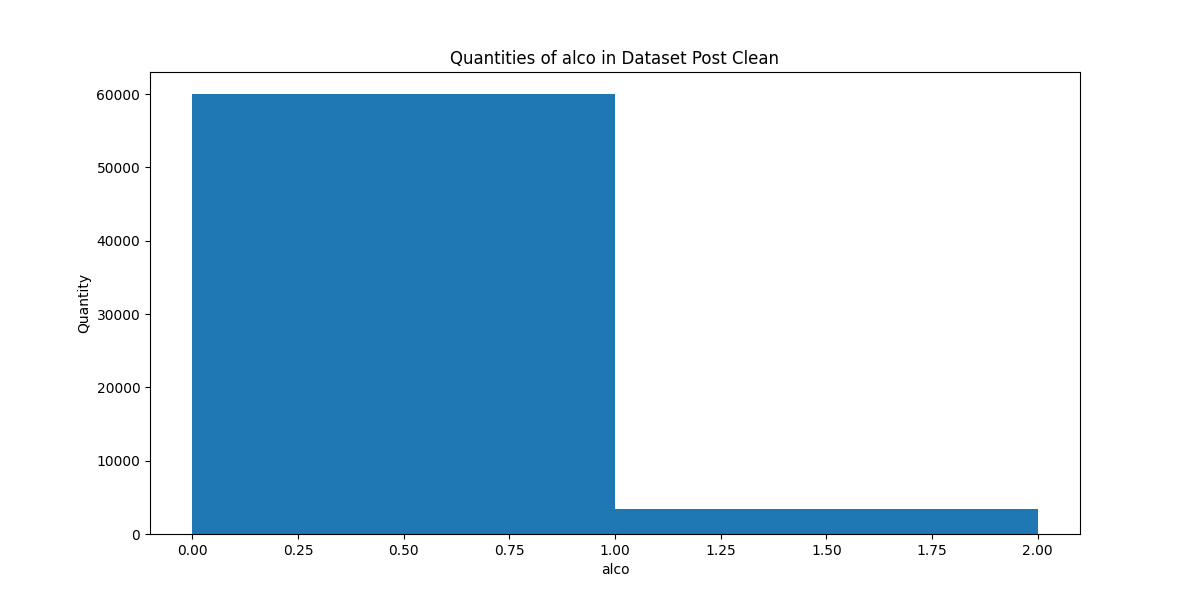

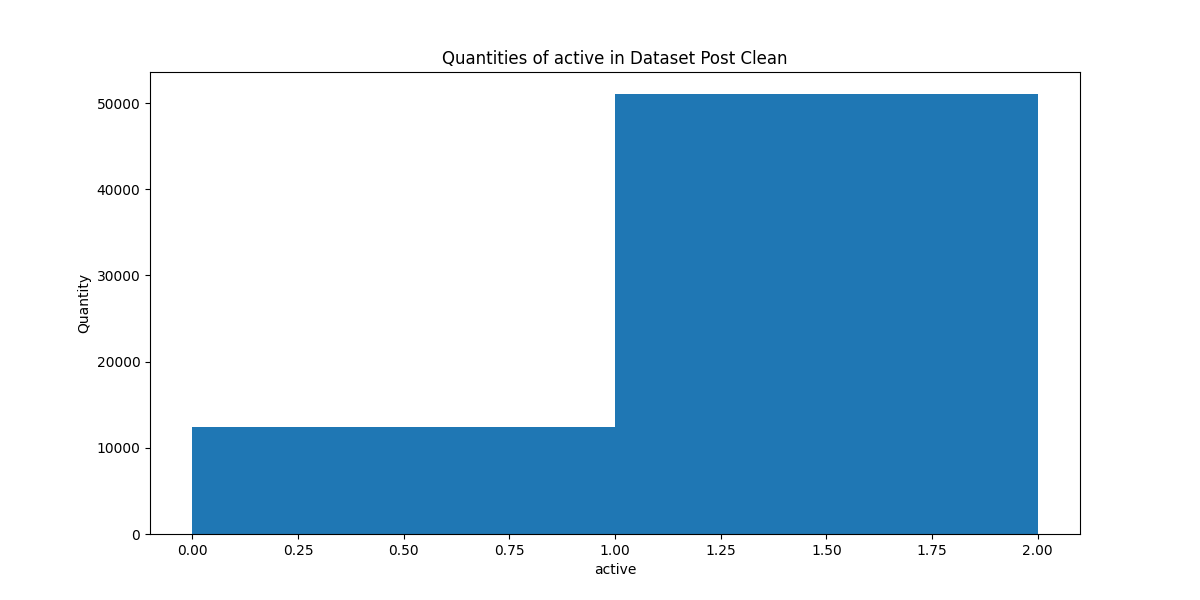

C:\Users\benal\AppData\Local\Temp\ipykernel_13788\3376041504.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histData = [float(x) for x in bmi]


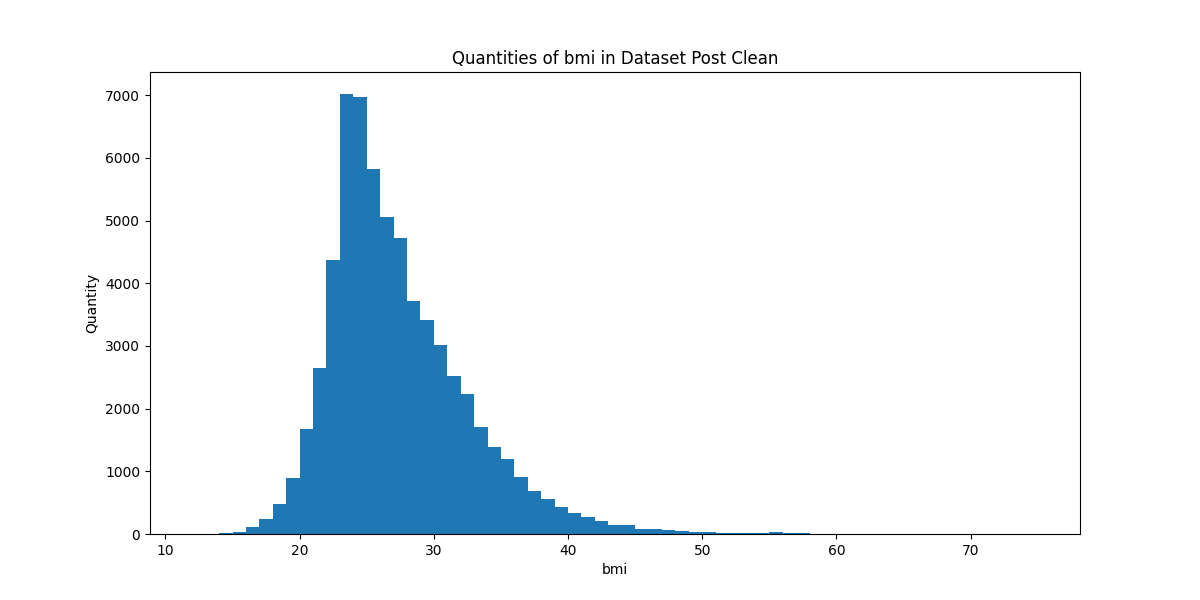

C:\Users\benal\AppData\Local\Temp\ipykernel_13788\3376041504.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histData = [int(x) for x in bloodPressure]


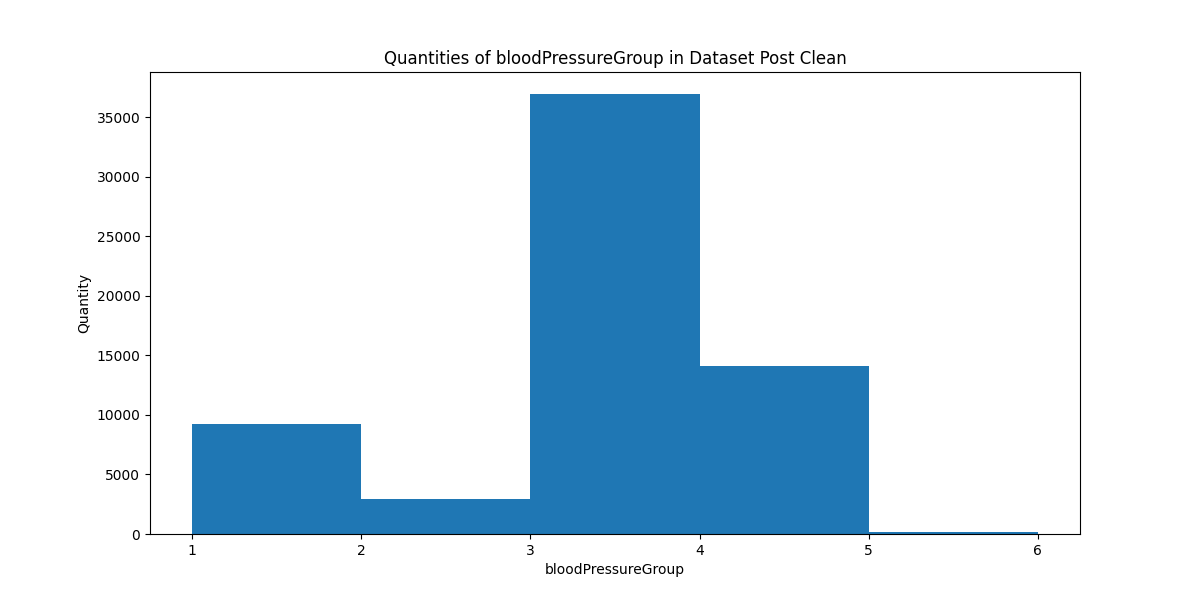

C:\Users\benal\AppData\Local\Temp\ipykernel_13788\3376041504.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histData = [float(x) for x in BPPA]


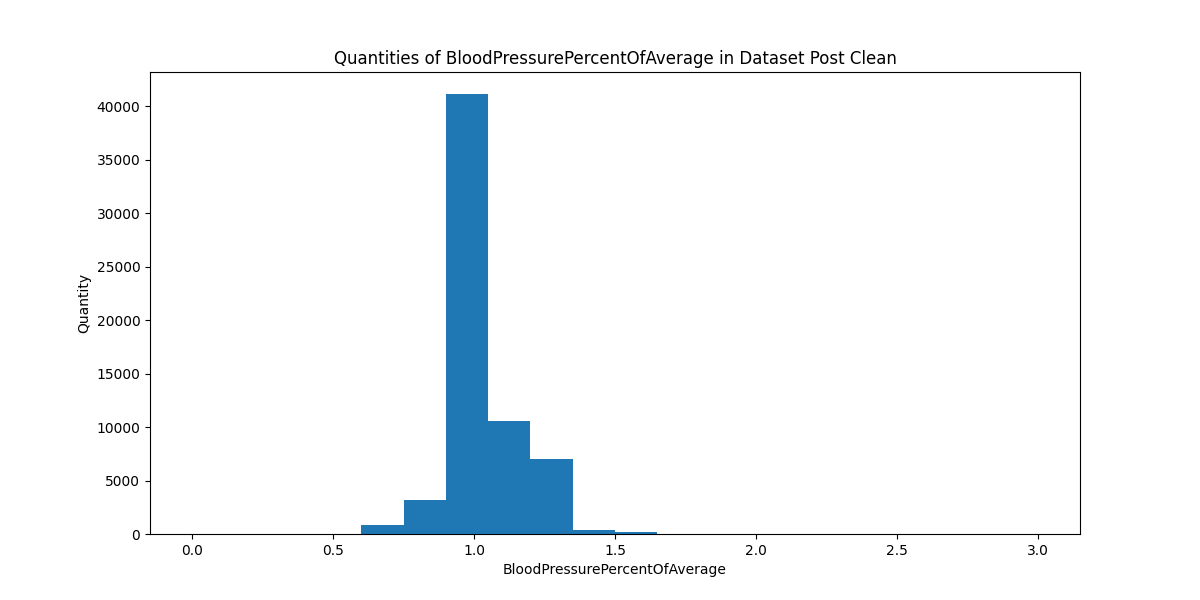

In [24]:
for y in range(0,11):

    plt.figure(figsize=(12, 6))

    if (y != 3 ):
        if y == 0:
            histData = [math.floor(int(x)) for x in cleaned_npDataset[:,y]]
        else:
            histData = [int(x) for x in cleaned_npDataset[:,y]]
        plt.title('Quantities of '+dataLabelsNew[y]+' in Dataset Post Clean')
        if (y == 4) or (y == 5):
            plt.hist(histData, bins = round((max(histData)-min(histData)+1)/10),range=(min(histData),max(histData)+1))
        else:
            plt.hist(histData, bins = max(histData)-min(histData)+1,range=(min(histData),max(histData)+1))
        plt.xlabel(dataLabelsNew[y])
        plt.ylabel("Quantity")
        plt.show()
    else:
        histData = [float(x) for x in cleaned_npDataset[:,y]]
        plt.title('Quantities of '+dataLabelsNew[y]+' in dataset')
        plt.hist(histData, bins = round(max(histData)-min(histData)+1),range=(math.floor(min(histData)),math.ceil(max(histData))+1))
        plt.xlabel(dataLabelsNew[y])
        plt.ylabel("Quantity")
        plt.show()

plt.figure(figsize=(12, 6))
histData = [float(x) for x in bmi]
plt.title('Quantities of bmi in Dataset Post Clean')
plt.hist(histData, bins = round(max(histData)-min(histData)+1),range=(math.floor(min(histData)),math.ceil(max(histData))+1))
plt.xlabel("bmi")
plt.ylabel("Quantity")
plt.show()

plt.figure(figsize=(12, 6))
histData = [int(x) for x in bloodPressure]
plt.title('Quantities of bloodPressureGroup in Dataset Post Clean')
plt.hist(histData, bins = max(histData)-min(histData)+1,range=(min(histData),max(histData)+1))
plt.xlabel("bloodPressureGroup")
plt.ylabel("Quantity")
plt.show()

plt.figure(figsize=(12, 6))
histData = [float(x) for x in BPPA]
plt.title('Quantities of BloodPressurePercentOfAverage in Dataset Post Clean')
plt.hist(histData, bins = round(max(histData)-min(histData)+1)*10,range=(math.floor(min(histData)),math.ceil(max(histData))+1))
plt.xlabel("BloodPressurePercentOfAverage")
plt.ylabel("Quantity")
plt.show()


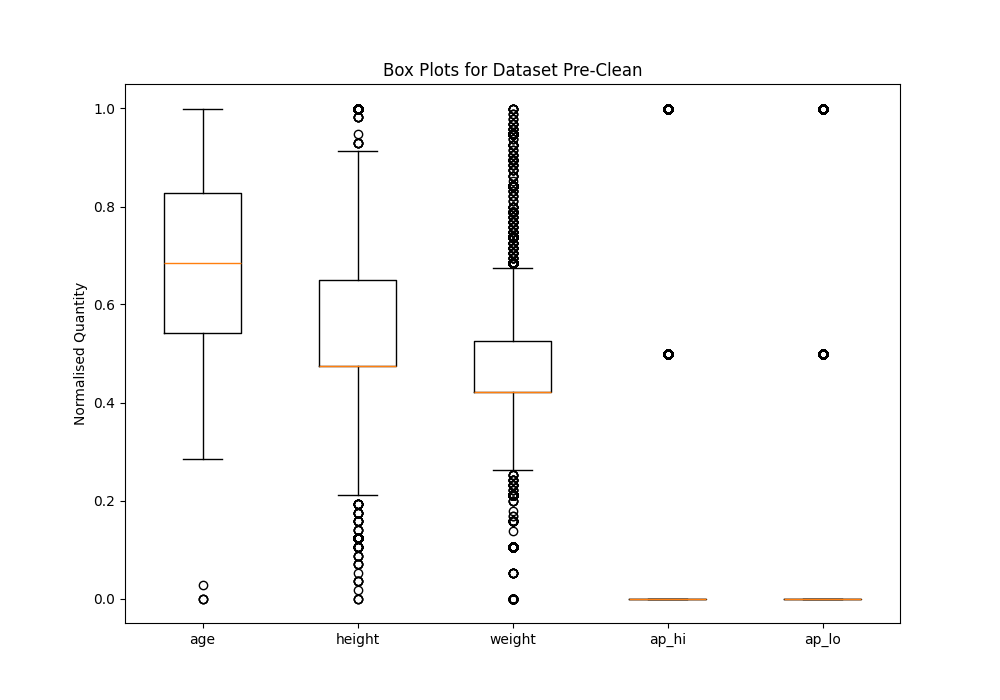

In [39]:
fig = plt.figure(figsize =(10, 7))
dataToPlot = [[float(x) for x in npDataset[:,y]] for y in [0,2,3,4,5]]
maxDataToPlot = [max(x) for x in dataToPlot]
minDataToPlot = [min(x) for x in dataToPlot]
dataToPlot = [[(float(x)-float(minDataToPlot[y]))/(float(maxDataToPlot[y])-float(minDataToPlot[y])) for x in dataToPlot[y]] for y in range(0,5)]
plt.boxplot(dataToPlot, labels=[dataLabelsNew[0],dataLabelsNew[2],dataLabelsNew[3],dataLabelsNew[4],dataLabelsNew[5]])
plt.ylabel("Normalised Quantity")
plt.title("Box Plots for Dataset Pre-Clean")
plt.show()


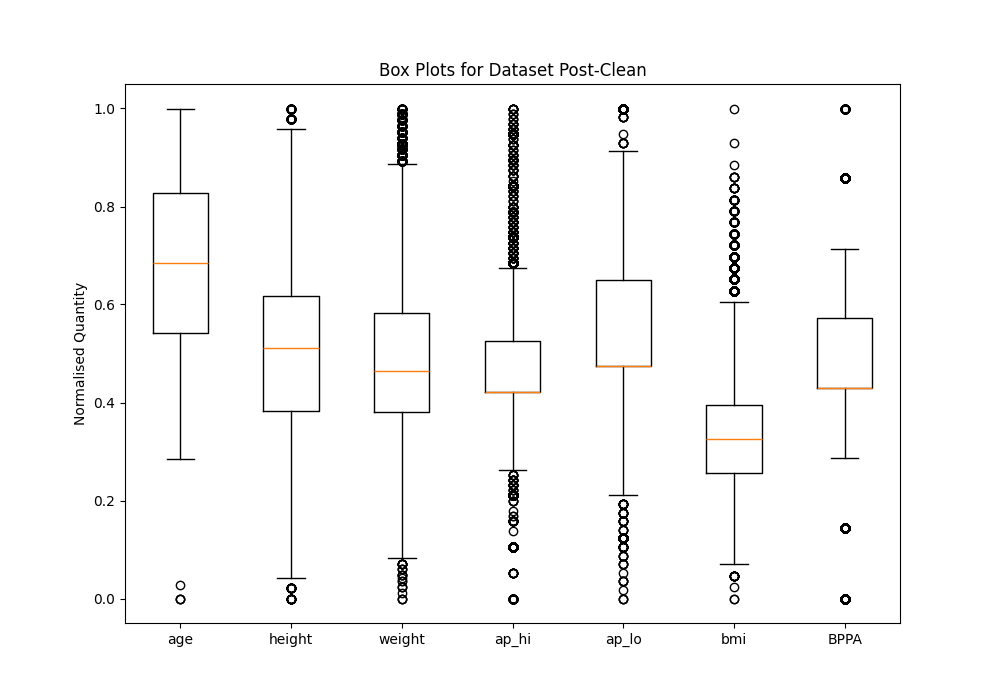

In [41]:
fig = plt.figure(figsize =(10, 7))
dataToPlot = [[float(x) for x in cleaned_npDataset3[:,y]] for y in [0,2,3,4,5,11,13]]
maxDataToPlot = [max(x) for x in dataToPlot]
minDataToPlot = [min(x) for x in dataToPlot]
dataToPlot = [[(float(x)-float(minDataToPlot[y]))/(float(maxDataToPlot[y])-float(minDataToPlot[y])) for x in dataToPlot[y]] for y in range(0,7)]
plt.boxplot(dataToPlot, labels=[dataLabelsNew[0],dataLabelsNew[2],dataLabelsNew[3],dataLabelsNew[4],dataLabelsNew[5],dataLabelsNew[11],dataLabelsNew[13]])
plt.ylabel("Normalised Quantity")
plt.title("Box Plots for Dataset Post-Clean")
plt.show()

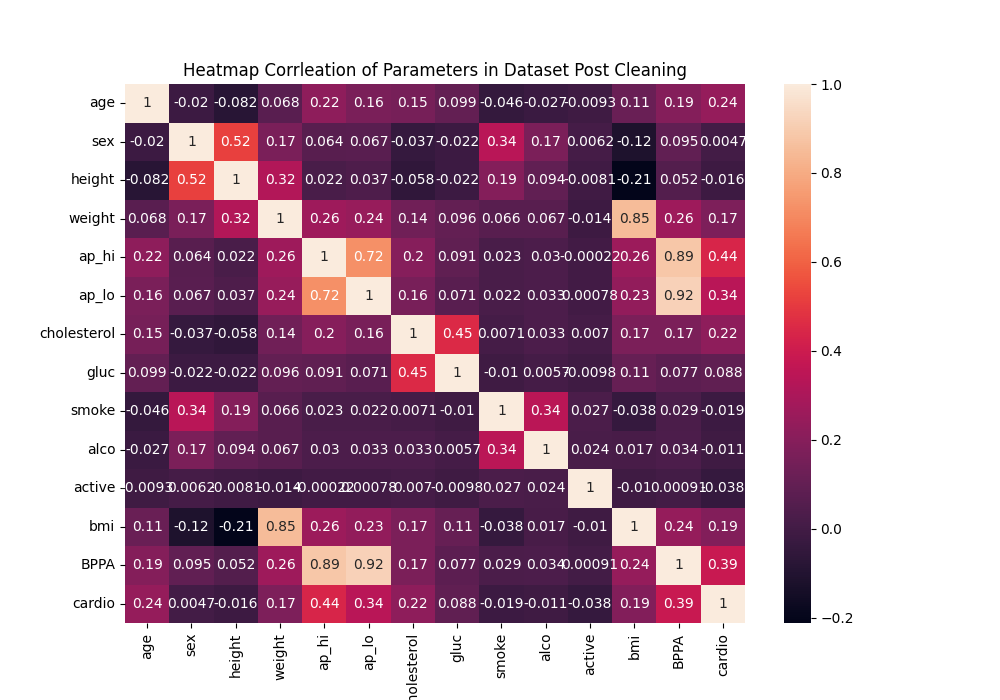

In [43]:
dataLabelsArray = np.array([x for x in dataLabelsNew])
outputDataset = cleaned_npDataset3#np.append(dataLabelsArray, cleaned_npDataset3, axis=0)
dataframeOut = pd.DataFrame(outputDataset, columns=dataLabelsArray)

dataframeOut = dataframeOut.drop(columns="BPGroup")

fig = plt.figure(figsize =(10, 7))
seaborn.heatmap(dataframeOut.corr(), annot=True)
plt.title('Heatmap Corrleation of Parameters in Dataset Post Cleaning')
plt.show()

#dataframeOut.drop('sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'smoke', 'alco', 'active'])


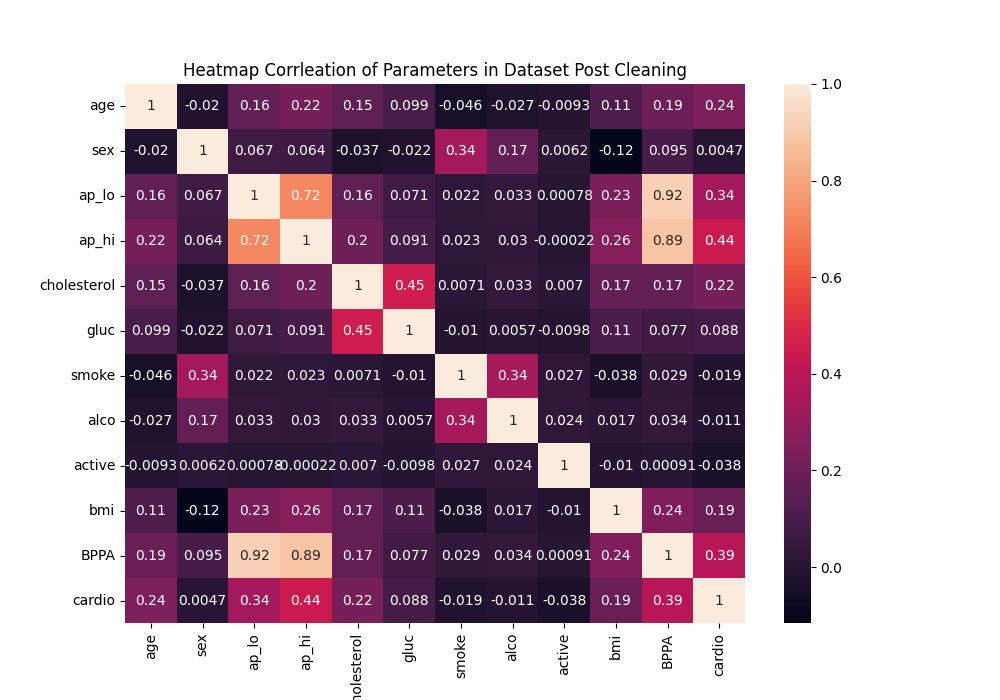

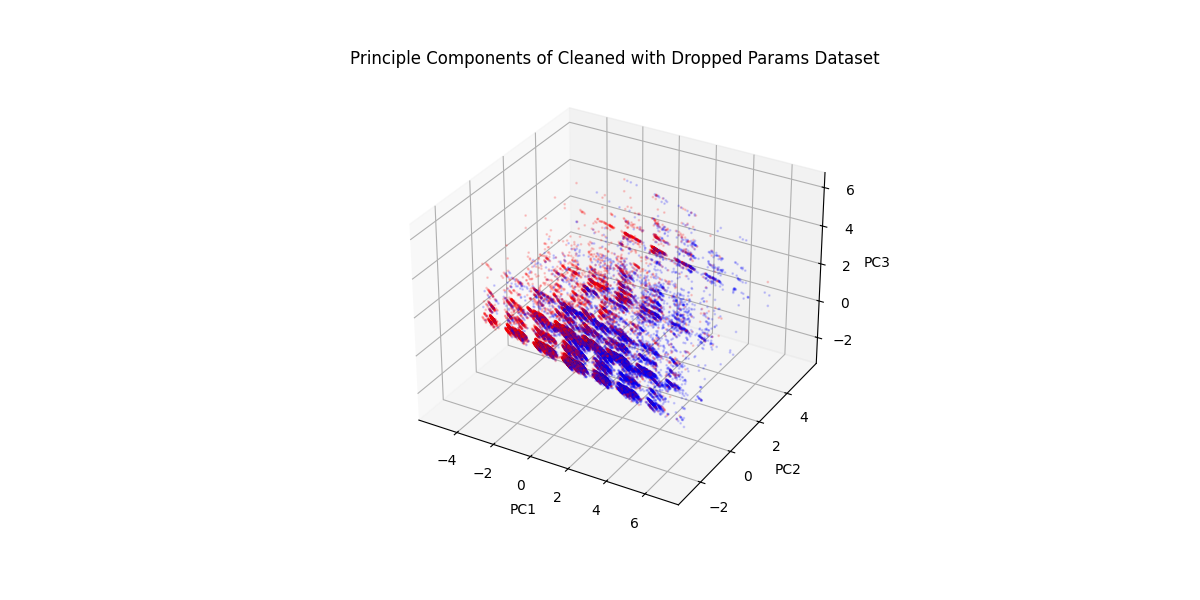

In [48]:

newDataFrame = dataframeOut[['age','sex','ap_lo','ap_hi','cholesterol','gluc','smoke','alco','active','bmi','BPPA','cardio']]

showDataFrame = newDataFrame.drop(columns="cardio")

scaler = StandardScaler()

scaled_X = scaler.fit_transform(showDataFrame)

pca = PCA(n_components=3)
components = pca.fit_transform(scaled_X)

pcaHue = pd.DataFrame(data = newDataFrame, columns=['cardio'])

componentsDf = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3'])
pcaDf = pd.concat([componentsDf, pcaHue], axis=1)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

x3d = pcaDf["PC1"]
y3d = pcaDf["PC2"]
z3d = pcaDf["PC3"]
l3d = pcaDf["cardio"]

l3d = l3d.map({'0':'red','1':'blue'})

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.set_title("Principle Components of Cleaned with Dropped Params Dataset")

ax.scatter(x3d,y3d,z3d, c = l3d, s = 1, alpha = 0.15, )

fig = plt.figure(figsize =(10, 7))
seaborn.heatmap(newDataFrame.corr(), annot=True)
plt.title('Heatmap Corrleation of Parameters in Dataset Post Cleaning')
plt.show()

In [31]:
newDataFrame.to_csv("cleanedDataSet.csv", header=True, index=False)

In [32]:
with open(directory+'\\..\\Data Cleaning\\cleanedDataSet.csv', 'r') as csvfile:
    dataset = list(csv.reader(csvfile))

datasetLength = len(dataset)
dataLabelsS = dataset[0]
dataset = dataset[1:datasetLength]
npDataset = np.array(dataset, dtype='float64')

print("Length: ",len(dataset))

Length:  61535


In [33]:
tempMask =  [[0] for x in npDataset]
tempMaskNeg =  [[0] for x in npDataset]

for i in range(0,len(npDataset)):
    tempMask[i] = ((int(npDataset[i,1]) == 1))
    tempMaskNeg[i] = ((int(npDataset[i,1]) == 2))

femaleArrayS = npDataset[tempMask]
maleArrayS = npDataset[tempMaskNeg]


dataLabels = np.delete(dataLabelsS,1)
femaleArray = np.delete(femaleArrayS,1,1)
maleArray = np.delete(maleArrayS,1,1)

X = npDataset[:,0:(len(dataLabelsS)-1)]
Y = npDataset[:,len(dataLabelsS)-1]

Xfemale = femaleArray[:,0:(len(dataLabels)-1)]
Yfemale = femaleArray[:,len(dataLabels)-1]

Xmale = maleArray[:,0:(len(dataLabels)-1)]
Ymale = maleArray[:,len(dataLabels)-1]

In [34]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split


dataLabelsArray = np.array([x for x in dataLabels]) 
numberOfSets = 10

for i in range(1,numberOfSets+1):

    X_train, X_test, Y_train, Y_test = train_test_split(Xfemale, Yfemale, test_size=0.2)

    trainData = np.append(X_train, [[x] for x in Y_train], axis=1)
    trainDF = pd.DataFrame(trainData, columns=dataLabelsArray)

    trainDF.to_csv("female-train-"+str(i)+".csv", header=True, index=False)

    testData = np.append(X_test, [[x] for x in Y_test], axis=1)
    testDF = pd.DataFrame(testData, columns=dataLabelsArray)

    testDF.to_csv("female-test-"+str(i)+".csv", header=True, index=False)

for i in range(1,numberOfSets+1):

    X_train, X_test, Y_train, Y_test = train_test_split(Xmale, Ymale, test_size=0.2)

    trainData = np.append(X_train, [[x] for x in Y_train], axis=1)
    trainDF = pd.DataFrame(trainData, columns=dataLabelsArray)

    trainDF.to_csv("male-train-"+str(i)+".csv", header=True, index=False)

    testData = np.append(X_test, [[x] for x in Y_test], axis=1)
    testDF = pd.DataFrame(testData, columns=dataLabelsArray)

    testDF.to_csv("male-test-"+str(i)+".csv", header=True, index=False)


dataLabelsArray = np.array([x for x in dataLabelsS]) 

for i in range(1,numberOfSets+1):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    trainData = np.append(X_train, [[x] for x in Y_train], axis=1)
    trainDF = pd.DataFrame(trainData, columns=dataLabelsArray)

    trainDF.to_csv("train-"+str(i)+".csv", header=True, index=False)

    testData = np.append(X_test, [[x] for x in Y_test], axis=1)
    testDF = pd.DataFrame(testData, columns=dataLabelsArray)

    testDF.to_csv("test-"+str(i)+".csv", header=True, index=False)



